# Treinamento do Modelo de Previsão de Vendas de Sorvete

Este notebook demonstra o processo completo de análise de dados e treinamento do modelo para a sorveteria Gelato Mágico.

In [1]:
# Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import mlflow

# Adicionar diretório src ao path para importar nossos módulos
sys.path.append('../')
from src.pre_processamento import carregar_dados, explorar_dados, preparar_dados
from src.modelo import ModeloVendasSorvete

## 1. Carregamento e Exploração dos Dados

In [2]:
# Carregar os dados
caminho_dados = '../inputs/base_vendas_sorvete.csv'
dados = carregar_dados(caminho_dados)

Dados carregados com sucesso: 100 registros e 3 colunas.


In [3]:
# Exibir informações básicas dos dados
print("Primeiras 5 linhas:")
print(dados.head())

print("\nInformações dos dados:")
dados.info()

Primeiras 5 linhas:
         Data  Vendas  Temperatura
0  01/01/2025     120           30
1  02/01/2025     150           32
2  03/01/2025     100           28
3  04/01/2025     180           33
4  05/01/2025     130           29

Informações dos dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Data         100 non-null    object
 1   Vendas       100 non-null    int64 
 2   Temperatura  100 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 2.5+ KB


In [4]:
# Estatísticas descritivas
dados.describe()

,Vendas,Temperatura
count,100.000000,100.000000
mean,111.530000,28.450000
std,46.919758,4.885301
min,40.000000,20.000000
25%,69.750000,25.000000
50%,114.000000,28.000000
75%,146.000000,32.000000
max,218.000000,37.000000


## 2. Análise Exploratória dos Dados

Correlação entre Temperatura e Vendas:
             Temperatura    Vendas
Temperatura     1.000000  0.948338
Vendas          0.948338  1.000000


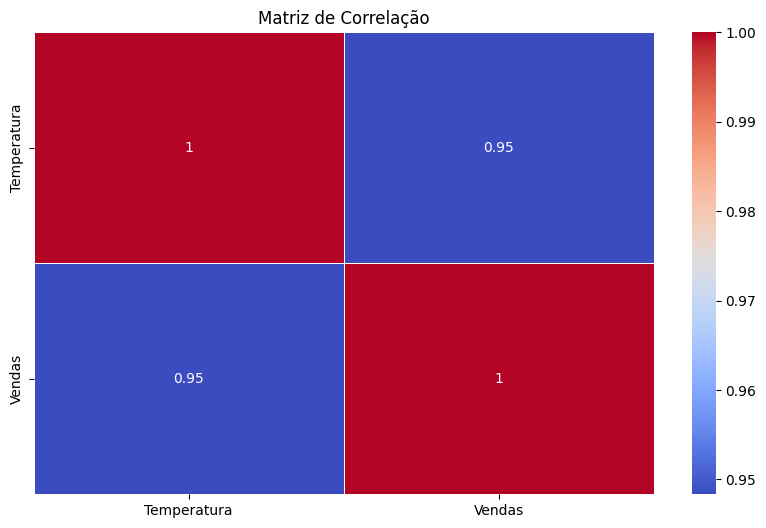

In [5]:
# Verificar a correlação entre temperatura e vendas
correlacao = dados[['Temperatura', 'Vendas']].corr()
print("Correlação entre Temperatura e Vendas:")
print(correlacao)

# Visualizar correlação
plt.figure(figsize=(10, 6))
sns.heatmap(correlacao, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlação')
plt.show()

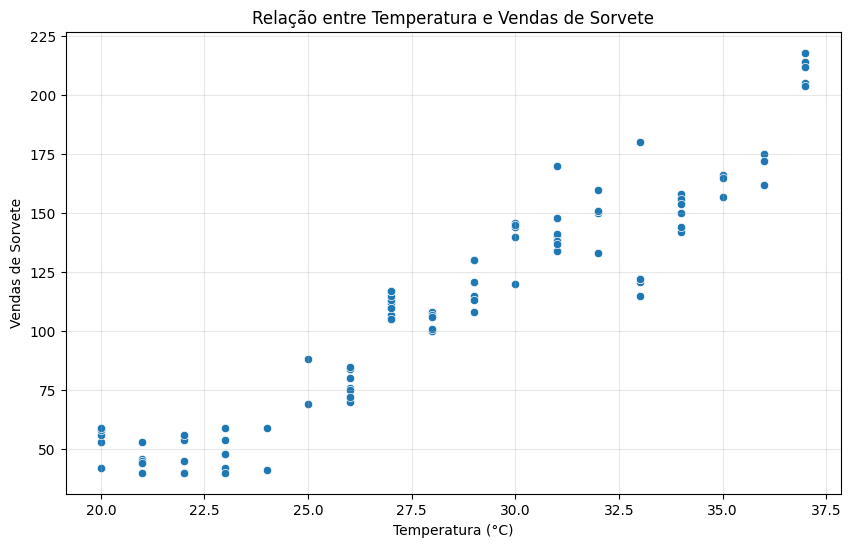

In [6]:
# Gráfico de dispersão entre Temperatura e Vendas
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Temperatura', y='Vendas', data=dados)
plt.title('Relação entre Temperatura e Vendas de Sorvete')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Vendas de Sorvete')
plt.grid(True, alpha=0.3)
plt.show()

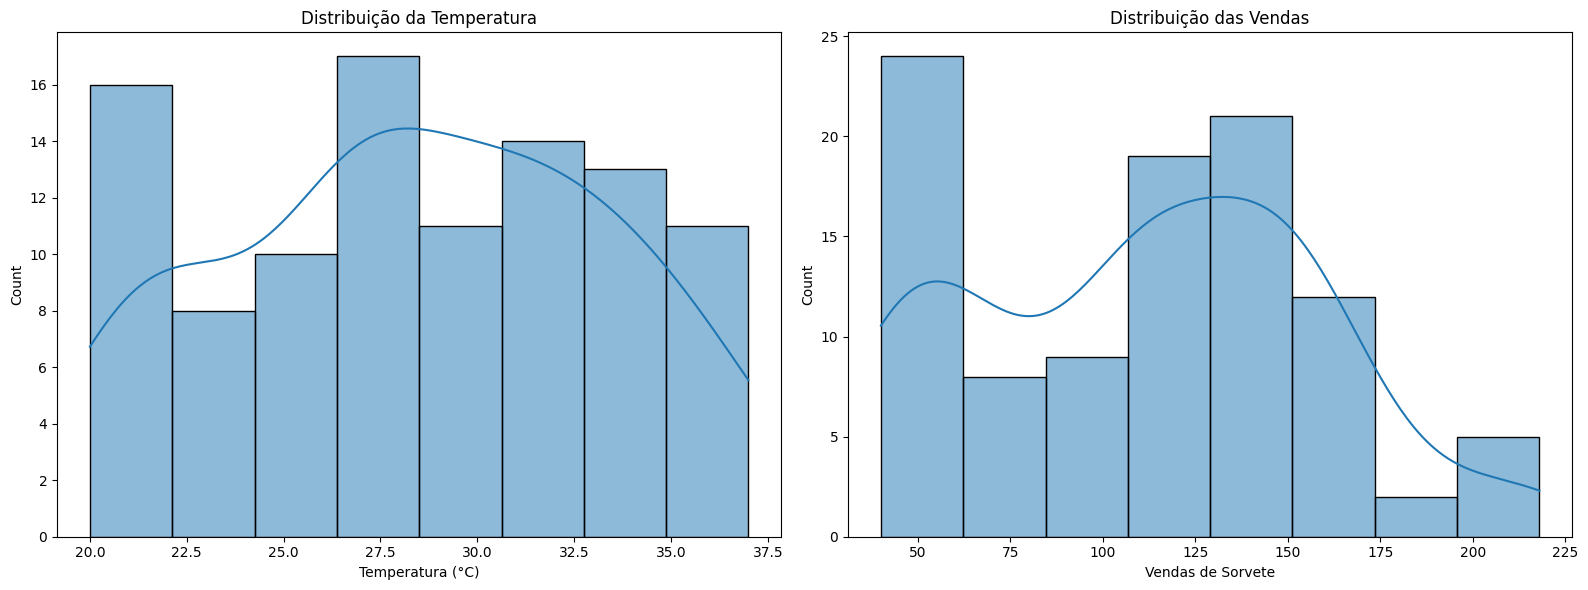

In [7]:
# Distribuição da temperatura
plt.figure(figsize=(16, 6))

plt.subplot(1, 2, 1)
sns.histplot(dados['Temperatura'], kde=True)
plt.title('Distribuição da Temperatura')
plt.xlabel('Temperatura (°C)')

plt.subplot(1, 2, 2)
sns.histplot(dados['Vendas'], kde=True)
plt.title('Distribuição das Vendas')
plt.xlabel('Vendas de Sorvete')

plt.tight_layout()
plt.show()

## 3. Preparação dos Dados

In [8]:
# Preparar dados para treinamento e teste
X_train, X_test, y_train, y_test = preparar_dados(dados)

print(f"Formas dos conjuntos:\nX_train: {X_train.shape}\nX_test: {X_test.shape}\ny_train: {y_train.shape}\ny_test: {y_test.shape}")

Dados divididos: 80 amostras de treino e 20 amostras de teste.
Formas dos conjuntos:
X_train: (80, 1)
X_test: (20, 1)
y_train: (80,)
y_test: (20,)


## 4. Treinamento do Modelo

In [9]:
# Criar e treinar o modelo
modelo = ModeloVendasSorvete()
modelo.treinar(X_train, y_train)

Modelo treinado com sucesso!
Coeficientes: [9.28035522]
Intercepto: -151.08954382624813


LinearRegression()

## 5. Avaliação do Modelo

In [10]:
# Fazer previsões com o conjunto de teste
y_pred = modelo.prever(X_test)

# Avaliar o modelo
metricas = modelo.avaliar(X_test, y_test)

# Exibir métricas
for metrica, valor in metricas.items():
    print(f"{metrica}: {valor:.2f}")

Métricas de avaliação:
MAE: 12.68
MSE: 241.66
RMSE: 15.55
R2: 0.83
MAE: 12.68
MSE: 241.66
RMSE: 15.55
R2: 0.83


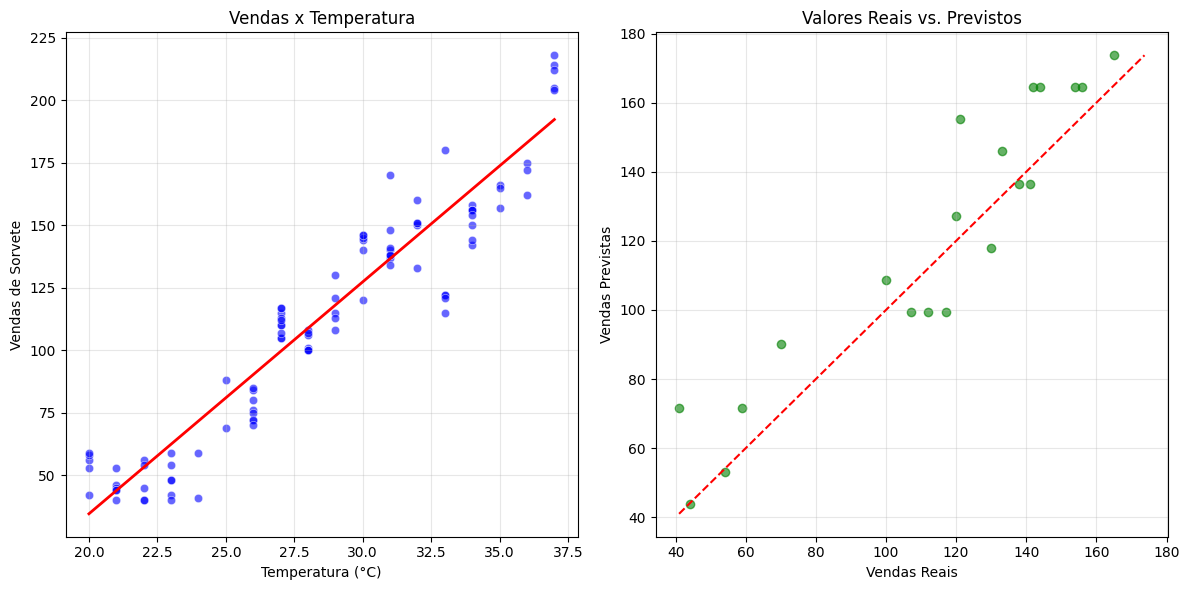

<module 'matplotlib.pyplot' from 'C:\\Users\\gilso\\AppData\\Local\\Programs\\Python\\Python310\\lib\\site-packages\\matplotlib\\pyplot.py'>

In [11]:
# Visualizar os resultados
modelo.visualizar_resultados(
    np.vstack((X_train, X_test)), 
    np.concatenate((y_train, y_test)),
    X_test, y_test, y_pred
)

## 6. Registro com MLflow

Modelo treinado com sucesso!
Coeficientes: [9.28035522]
Intercepto: -151.08954382624813
Métricas de avaliação:
MAE: 12.68
MSE: 241.66
RMSE: 15.55
R2: 0.83


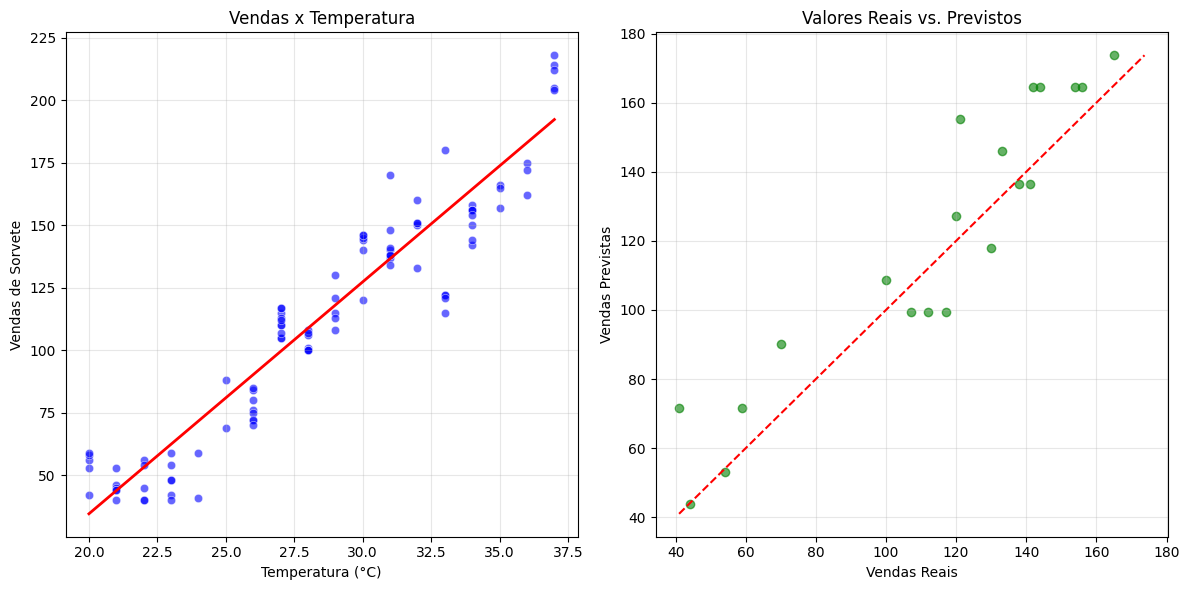

Modelo registrado no MLflow com run_id: 74b08b3e8b714edeb27d53bcb3532fbd
Modelo registrado no MLflow com run_id: 74b08b3e8b714edeb27d53bcb3532fbd


<Figure size 640x480 with 0 Axes>

In [12]:
# Registrar modelo no MLflow
run_id = modelo.registrar_modelo_mlflow(X_train, y_train, X_test, y_test, run_name="Notebook_Run")
print(f"Modelo registrado no MLflow com run_id: {run_id}")

## 7. Usando o Modelo para Previsões

    Temperatura  Vendas_Previstas
0            20                34
1            21                43
2            22                53
3            23                62
4            24                71
5            25                80
6            26                90
7            27                99
8            28               108
9            29               118
10           30               127
11           31               136
12           32               145
13           33               155
14           34               164
15           35               173


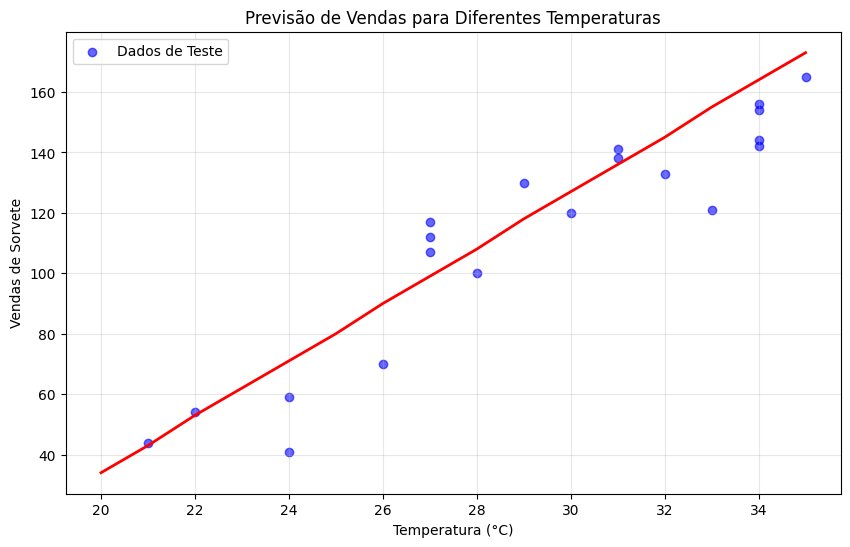

In [13]:
# Fazer previsões para diferentes temperaturas
temperaturas_demo = np.arange(20, 36, 1).reshape(-1, 1)
vendas_previstas = modelo.prever(temperaturas_demo)

# Criar DataFrame com resultados
demo_df = pd.DataFrame({
    'Temperatura': temperaturas_demo.flatten(),
    'Vendas_Previstas': vendas_previstas.astype(int)
})

# Exibir resultados
print(demo_df)

# Plotar as previsões
plt.figure(figsize=(10, 6))
plt.plot(demo_df['Temperatura'], demo_df['Vendas_Previstas'], 'r-', linewidth=2)
plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Dados de Teste')
plt.title('Previsão de Vendas para Diferentes Temperaturas')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Vendas de Sorvete')
plt.grid(True, alpha=0.3)
plt.legend()
plt.show()

In [14]:
# Demonstração de uso prático: insira uma temperatura para prever vendas
def prever_vendas(temperatura): 
    previsao = modelo.prever(temperatura)
    return int(previsao[0])

# Exemplo de uso
temp_exemplo = 30
vendas_previstas = prever_vendas(temp_exemplo)
print(f"Para uma temperatura de {temp_exemplo}°C, a previsão de vendas é de {vendas_previstas} sorvetes.")

Para uma temperatura de 30°C, a previsão de vendas é de 127 sorvetes.


## 8. Salvando o Modelo para Uso Futuro

In [15]:
# Salvar o modelo treinado
modelo.salvar_modelo(caminho='../outputs/modelo_final.joblib')

# Demonstração: como carregar o modelo salvo
novo_modelo = ModeloVendasSorvete()
novo_modelo.carregar_modelo(caminho='../outputs/modelo_final.joblib')

# Testar o modelo carregado
teste_temp = 25
previsao = int(novo_modelo.prever(teste_temp)[0])
print(f"Teste com modelo carregado: Para {teste_temp}°C, previsão de {previsao} vendas.")

Modelo salvo em: ../outputs/modelo_final.joblib
Modelo carregado de: ../outputs/modelo_final.joblib
Teste com modelo carregado: Para 25°C, previsão de 80 vendas.


In [16]:
import joblib

# Carregar o modelo salvo
modelo = joblib.load('../outputs/modelo_final.joblib')

# Fazer uma previsão para uma temperatura de 30°C
temperatura = [[30]]  # Temperatura em graus Celsius
previsao = modelo.predict(temperatura)

# Exibir o resultado
print(f"Para uma temperatura de {temperatura[0][0]}°C, a previsão de vendas é de {int(previsao[0])} sorvetes.")

Para uma temperatura de 30°C, a previsão de vendas é de 127 sorvetes.


✅ Arquivo salvo com sucesso em:
C:\MLVendasLab\outputs\temp_plot.png
✅ Tamanho do arquivo: 319.3 KB


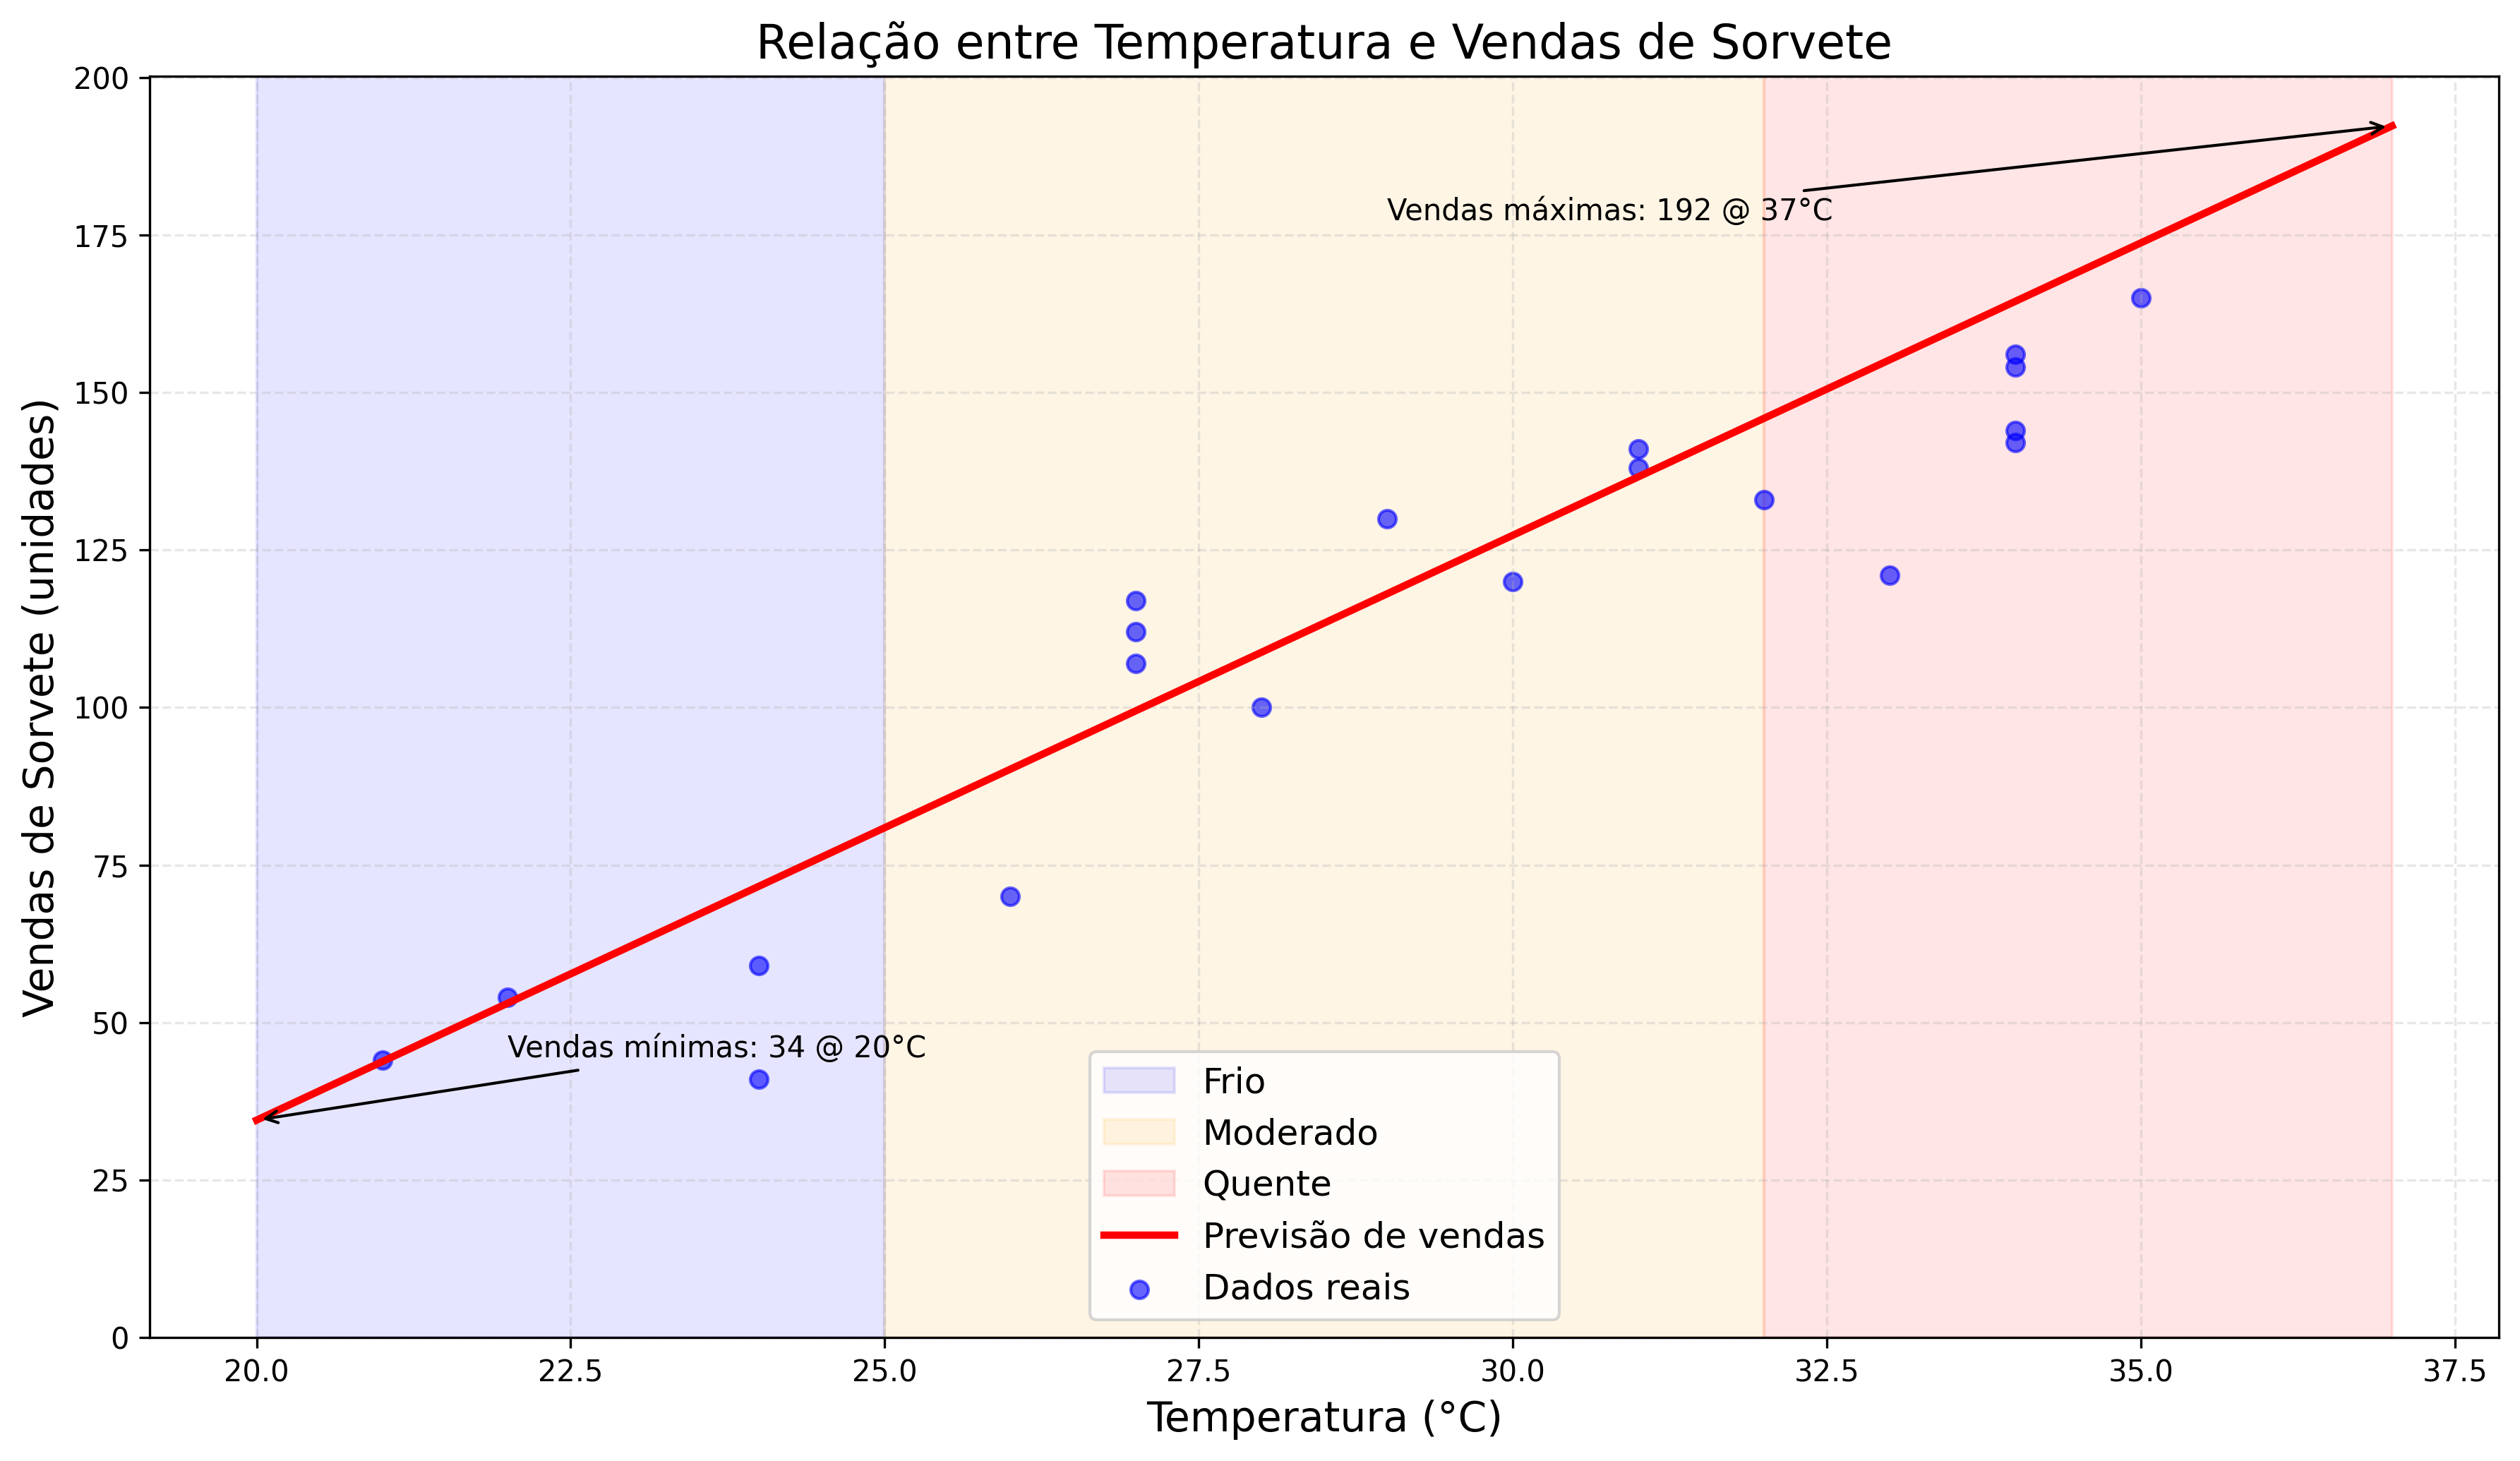

In [17]:
# Gerar e salvar gráfico de temperatura x vendas como temp_plot.png
import os
import matplotlib.pyplot as plt
import numpy as np
from IPython.display import Image, display  # Importando display!

# Garantir que o diretório outputs existe
os.makedirs('../outputs', exist_ok=True)

# Carregar o modelo se não estiver já carregado
try:
    modelo
except NameError:
    import joblib
    modelo = joblib.load('../outputs/modelo_final.joblib')

# Gerar dados para plotagem
temperaturas = np.linspace(20, 37, 100).reshape(-1, 1)
vendas_previstas = modelo.predict(temperaturas)

# Criar figura de alta qualidade
plt.figure(figsize=(12, 7), dpi=300)

# Adicionar áreas sombreadas para faixas de temperatura
plt.axvspan(20, 25, alpha=0.1, color='blue', label='Frio')
plt.axvspan(25, 32, alpha=0.1, color='orange', label='Moderado')
plt.axvspan(32, 37, alpha=0.1, color='red', label='Quente')

# Plotar a linha de previsão
plt.plot(temperaturas, vendas_previstas, 'r-', linewidth=2.5, label='Previsão de vendas')

# Adicionar pontos de dados reais (se disponíveis)
try:
    plt.scatter(X_test, y_test, color='blue', alpha=0.6, label='Dados reais')
except NameError:
    print("Variáveis X_test e y_test não encontradas. Plotando apenas a previsão.")

# Configurações estéticas
plt.title('Relação entre Temperatura e Vendas de Sorvete', fontsize=16)
plt.xlabel('Temperatura (°C)', fontsize=14)
plt.ylabel('Vendas de Sorvete (unidades)', fontsize=14)
plt.grid(True, alpha=0.3, linestyle='--')
plt.legend(fontsize=12)

# Ajustar limites e ticks do eixo y
plt.ylim(bottom=0)  # Vendas não podem ser negativas

# Adicionar anotações
min_temp, max_temp = 20, 37
min_venda, max_venda = min(vendas_previstas), max(vendas_previstas)
plt.annotate(f'Vendas mínimas: {int(min_venda)} @ {min_temp}°C', 
             xy=(min_temp, min_venda), xytext=(min_temp+2, min_venda+10),
             arrowprops=dict(arrowstyle='->'))
plt.annotate(f'Vendas máximas: {int(max_venda)} @ {max_temp}°C', 
             xy=(max_temp, max_venda), xytext=(max_temp-8, max_venda-15),
             arrowprops=dict(arrowstyle='->'))

# Salvar o gráfico em alta resolução
plt.tight_layout()
caminho_arquivo = os.path.abspath('../outputs/temp_plot.png')
plt.savefig(caminho_arquivo, dpi=300, bbox_inches='tight')

# Remover esta linha para não mostrar duas vezes
# plt.show()  <- REMOVA OU COMENTE ESTA LINHA

# Fechar o gráfico
plt.close()

# Verificar se o arquivo foi salvo corretamente
if os.path.exists(caminho_arquivo):
    tamanho = os.path.getsize(caminho_arquivo)
    print(f"✅ Arquivo salvo com sucesso em:\n{caminho_arquivo}")
    print(f"✅ Tamanho do arquivo: {tamanho/1024:.1f} KB")
    
    # Esta linha mostrará a imagem salva
    display(Image(caminho_arquivo))
else:
    print(f"❌ Erro: O arquivo não foi salvo em {caminho_arquivo}")